# 확장 프로젝트 3: 영화 산업 지표와 외부 지표 비교

# 데이터 불러오기

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("omarhanyy/imdb-top-1000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-top-1000


# 데이터 확인

In [ ]:
import pandas as pd
import numpy as np
import os

# 다운로드된 파일 목록 확인
print(os.listdir(path))

# CSV 파일 읽기 (파일명이 imdb_top_1000.csv 일 가능성이 큼)
csv_file = os.path.join(path, "IMDB top 1000.csv")
df = pd.read_csv(csv_file)

# DataFrame 출력
display(df.head())
df.info()

['IMDB top 1000.csv']


,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


### 특성(컬럼) 출력

In [ ]:
# 컬럼명만 출력
print(df.columns.tolist())

['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate', 'Metascore', 'Description', 'Cast', 'Info']


### 연도(Released_Year) 특성 생성

In [ ]:
# Title에서 연도 추출 (정규표현식: 괄호 안 4자리 숫자)
df["Released_Year"] = df["Title"].astype(str).str.extract(r"\((\d{4})\)")
# 숫자형으로 변환
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
# 확인 ( Title, Released_Year 만 10개 출력해서 확인)
print(df[["Title", "Released_Year"]].head(10))

                                               Title  Released_Year
0                 1. The Shawshank Redemption (1994)           1994
1                            2. The Godfather (1972)           1972
2                          3. The Dark Knight (2008)           2008
3                   4. The Godfather: Part II (1974)           1974
4  5. The Lord of the Rings: The Return of the Ki...           2003
5                             6. Pulp Fiction (1994)           1994
6                         7. Schindler's List (1993)           1993
7                             8. 12 Angry Men (1957)           1957
8                                9. Inception (2010)           2010
9                              10. Fight Club (1999)           1999


# 기초 통계 / 기술 통계

#### 1.시기 특성 만들기 ( 시기 = 10년 )

In [ ]:
# Decade 컬럼 생성 (10년 단위)
# 1975의 경우: 1975//10 -> 197, 197*10 -> 1970
df["Decade"] = (df["Released_Year"] // 10) * 10
# 확인
display(df[["Title", "Released_Year", "Decade"]].head(15))

,Title,Released_Year,Decade
0,1. The Shawshank Redemption (1994),1994,1990
1,2. The Godfather (1972),1972,1970
2,3. The Dark Knight (2008),2008,2000
3,4. The Godfather: Part II (1974),1974,1970
4,5. The Lord of the Rings: The Return of the Ki...,2003,2000
5,6. Pulp Fiction (1994),1994,1990
6,7. Schindler's List (1993),1993,1990
7,8. 12 Angry Men (1957),1957,1950
8,9. Inception (2010),2010,2010
9,10. Fight Club (1999),1999,1990


#### 2.장르 분리하기
1. 장르 특성을 리스트로 변환 "Drama, Crime" → ["Drama", "Crime"]
2. 리스트로 변환된 형태를 explode("Genre")를 써서 행으로 풀어서 늘려줌
```python
Title                  Genre
Inception (2010)       ["Action", "Sci-Fi"]
```
explode 하면 아래와 같이 변환
```python
Title                  Genre
Inception (2010)       Action
Inception (2010)       Sci-Fi
```
한 영화가 여러 개 장르를 가질 때, 각각의 장르로 따로 계산할 수 있게 함

In [ ]:
# 장르 분리 (여러 장르가 들어가 있으므로 explode)
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre")
display(df[["Title", "Genre"]])

,Title,Genre
0,1. The Shawshank Redemption (1994),Drama
1,2. The Godfather (1972),Crime
1,2. The Godfather (1972),Drama
2,3. The Dark Knight (2008),Action
2,3. The Dark Knight (2008),Crime
...,...,...
997,400. JFK (1991),History
997,400. JFK (1991),Thriller
998,301. Nights of Cabiria (1957),Drama
999,302. Throne of Blood (1957),Drama


#### 3.Info 컬럼에서 투표 수(Votes) 추출 (숫자만 뽑기)


In [ ]:
df["Vote"] = df["Info"].str.extract(r"(\d[\d,]*)")   # 예: "2,345,678"
df["Vote"] = df["Vote"].str.replace(",", "")      # 콤마 제거
df["Vote"] = pd.to_numeric(df["Vote"], errors="coerce")
# display(df)
# Decade × Genre별 평균 투표 수
# vote_by_decade_genre = df.groupby(["Decade", "Genre"])["Vote"].mean().reset_index()
# display(vote_by_decade_genre)

#### 4.Info 컬럼에서 흥행 수익(Gross) 추출

In [ ]:
# (예: "$123,456,789" → 123456789)
df["Gross"] = df["Info"].str.extract(r"\$([\d,]+)")
df["Gross"] = df["Gross"].str.replace(",", "", regex=True)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

#### 5.계층형 인덱스(멀티 인덱스) 해제: 시기별 각 장르의 평균 평점 및 영화 숫자 파악
- Pandas를 활용한 추가 분석/시각화를 위해 일반 인덱스로 변환( 계층형 인덱스를 해제 )

In [ ]:
# Decade × Genre별 평균 Rate 계산
result = df.groupby(["Decade", "Genre"]).agg(
    Avg_Rate=("Rate", "mean"),
    Avg_Vote = ("Vote", "mean"),
    Avg_Gross=("Gross", "mean"),
    Count=("Rate", "size")
).reset_index()
# 확인
# display(result.head(30))

,Decade,Genre,Avg_Rate,Avg_Vote,Avg_Gross,Count
0,1920,Action,8.112500,74584.125000,0.875000,8
1,1920,Adventure,8.112500,81864.500000,1.500000,8
2,1920,Biography,8.100000,46359.000000,0.000000,7
3,1920,Comedy,8.123529,59142.588235,1.700000,17
4,1920,Drama,8.129412,59735.470588,0.647059,17
5,1920,Family,8.300000,110513.000000,5.000000,1
6,1920,Fantasy,8.100000,56194.000000,NaN,7
7,1920,History,8.100000,46359.000000,0.000000,7
8,1920,Horror,8.100000,56194.000000,NaN,7
9,1920,Mystery,8.100000,56194.000000,NaN,7


# 시각화 하기

#### 1.시기별 각 특성 평균 시각화 (Line 그래프)

In [ ]:
!apt -y install fonts-nanum > /dev/null

# 2) Matplotlib에 폰트 등록 + 한글/마이너스 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# 설치된 나눔고딕 경로 탐색 후 등록
nanum_dir = "/usr/share/fonts/truetype/nanum"
for f in fm.findSystemFonts(fontpaths=[nanum_dir]):
    fm.fontManager.addfont(f)

plt.rcParams["font.family"] = "NanumGothic"   # 또는 "NanumBarunGothic"
mpl.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 깨짐 방지

# 시기별 전체 평균 (장르 구분 없이)
decade_avg = result.groupby("Decade").agg(
    Avg_Rate=("Avg_Rate", "mean"),
    Avg_Vote=("Avg_Vote", "mean"),
    Avg_Gross=("Avg_Gross", "mean")
).reset_index()
decade_avg = decade_avg[decade_avg["Decade"] < 2020]

- 위에서 2020년대 제외시킨 이유, 영화가 1개임.

In [ ]:
df_2020s = df[df["Decade"] == 2020]
display(df_2020s[["Title", "Rate", "Vote", "Gross"]])
print(f'\n2020년대 영화 개수: {df_2020s.shape[0]}')

,Title,Rate,Vote,Gross
13,14. Hamilton (2020),8.7,44141,NaN
13,14. Hamilton (2020),8.7,44141,NaN
13,14. Hamilton (2020),8.7,44141,NaN



2020년대 영화 개수: 3


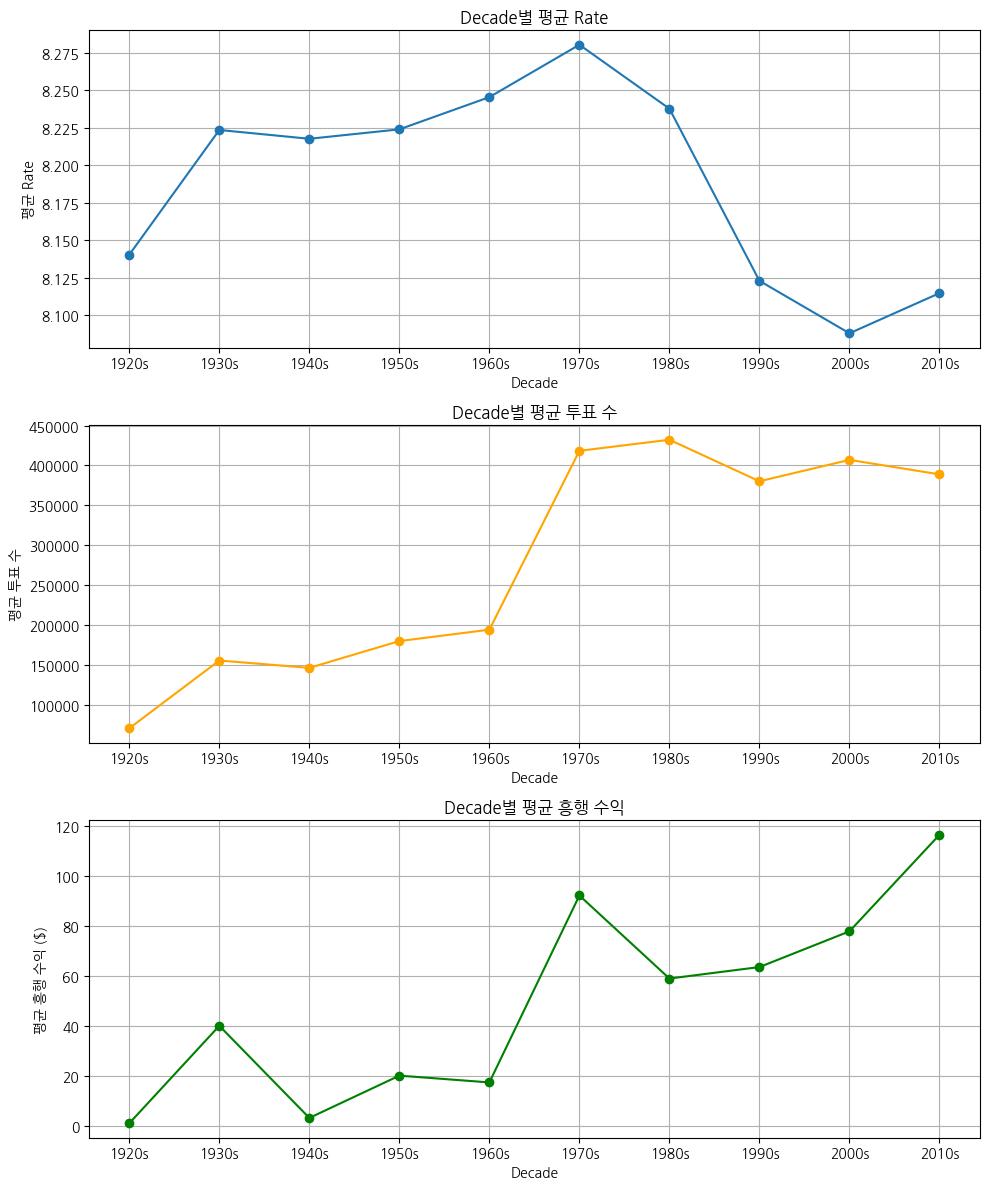

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 3행 1열 subplot

# 공통 X축 (10년 단위 + s 붙이기)
decades = np.arange(decade_avg["Decade"].min(),
                    decade_avg["Decade"].max() + 10, 10)
decade_labels = [f"{d}s" for d in decades]

# 1) 평균 Rate
axes[0].plot(decade_avg["Decade"], decade_avg["Avg_Rate"], marker="o")
axes[0].set_title("Decade별 평균 Rate")
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("평균 Rate")
axes[0].set_xticks(decades)
axes[0].set_xticklabels(decade_labels)
axes[0].grid(True)

# 2) 평균 Vote
axes[1].plot(decade_avg["Decade"], decade_avg["Avg_Vote"],
             marker="o", color="orange")
axes[1].set_title("Decade별 평균 투표 수")
axes[1].set_xlabel("Decade")
axes[1].set_ylabel("평균 투표 수")
axes[1].set_xticks(decades)
axes[1].set_xticklabels(decade_labels)
axes[1].grid(True)

# 3) 평균 Gross
axes[2].plot(decade_avg["Decade"], decade_avg["Avg_Gross"],
             marker="o", color="green")
axes[2].set_title("Decade별 평균 흥행 수익")
axes[2].set_xlabel("Decade")
axes[2].set_ylabel("평균 흥행 수익 ($)")
axes[2].set_xticks(decades)
axes[2].set_xticklabels(decade_labels)
axes[2].grid(True)

plt.tight_layout()
plt.show()


#### 2.정규화를 통한 시기별 각 특성 평균 비교  (Line 그래프)

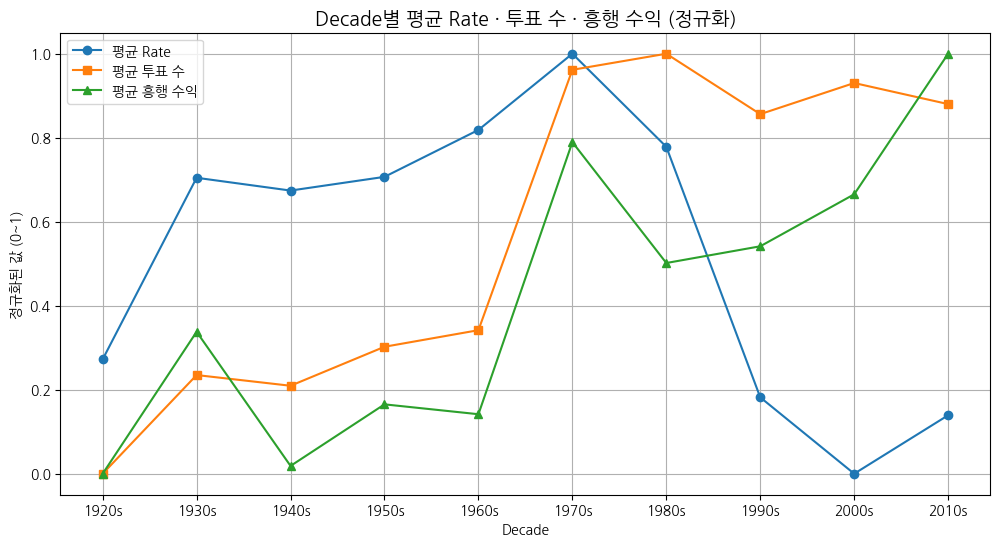

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Min-Max 정규화 함수
def minmax_norm(series):
    return (series - series.min()) / (series.max() - series.min())

# 정규화 적용
decade_avg["Rate_norm"] = minmax_norm(decade_avg["Avg_Rate"])
decade_avg["Vote_norm"] = minmax_norm(decade_avg["Avg_Vote"])
decade_avg["Gross_norm"] = minmax_norm(decade_avg["Avg_Gross"])

# 공통 X축 정의 (10년 단위)
decades = np.arange(decade_avg["Decade"].min(),
                    decade_avg["Decade"].max() + 10, 10)
decade_labels = [f"{d}s" for d in decades]

# 그래프
plt.figure(figsize=(12,6))
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Vote_norm"], marker="s", label="평균 투표 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="평균 흥행 수익")

plt.xticks(decades, decade_labels)  # <-- s 추가된 라벨 적용
plt.title("Decade별 평균 Rate · 투표 수 · 흥행 수익 (정규화)", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("정규화된 값 (0~1)")
plt.legend()
plt.grid(True)
plt.show()


#### 3.경제위기 구간 하이라이팅
- 그래프의 빨간 영역은 주요 경제위기 기간을 하이라이트
- 영화 산업 지표 변화와 외부 지표 간 상관성 해석에 활용 가능

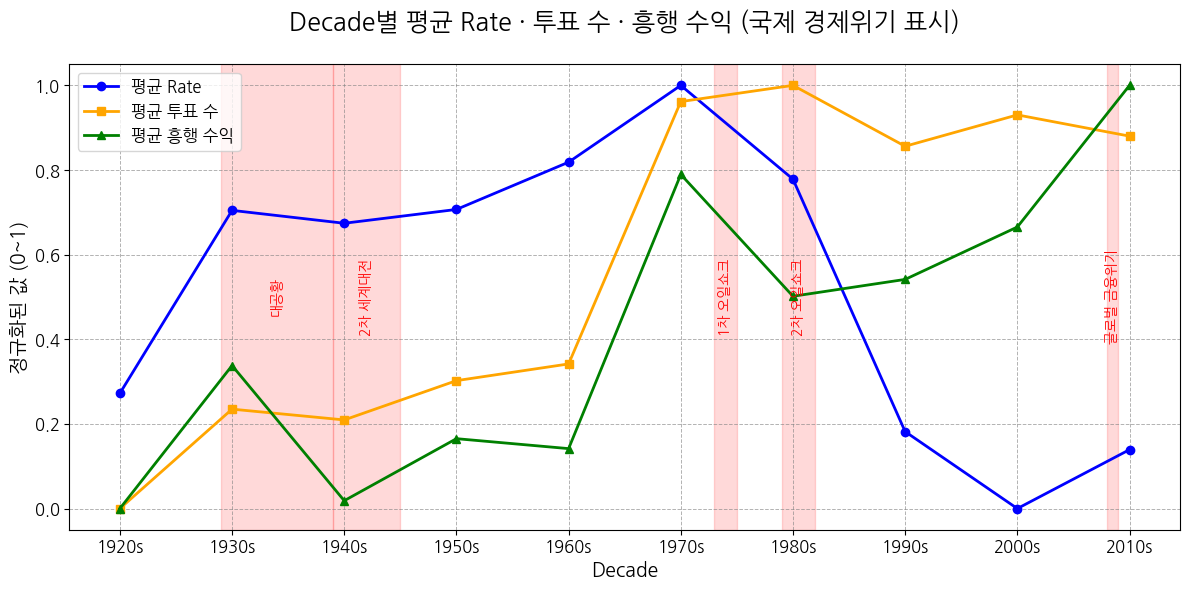

In [ ]:
# 📌 국제 경제위기 범위 (xmin, xmax, label)
crisis_ranges = [
    (1929, 1939, "대공황"),
    (1939, 1945, "2차 세계대전"),
    (1973, 1975, "1차 오일쇼크"),
    (1979, 1982, "2차 오일쇼크"),
    (2008, 2009, "글로벌 금융위기"),
]

plt.figure(figsize=(12,6))

plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"],
         marker="o", color="blue", linewidth=2, label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Vote_norm"],
         marker="s", color="orange", linewidth=2, label="평균 투표 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"],
         marker="^", color="green", linewidth=2, label="평균 흥행 수익")

# X축: 10년 단위 + 's' 붙여 표시
decades = np.arange(decade_avg["Decade"].min(),
                    decade_avg["Decade"].max() + 10, 10)
decade_labels = [f"{d}s" for d in decades]
plt.xticks(decades, decade_labels, fontsize=12)
plt.yticks(fontsize=12)

plt.title("Decade별 평균 Rate · 투표 수 · 흥행 수익 (국제 경제위기 표시)",
          fontsize=18, pad=25)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("정규화된 값 (0~1)", fontsize=14)

# 🔑 눈에 잘 보이는 그리드
plt.grid(True, which="both", axis="both",
         color="gray", linestyle="--", linewidth=0.7, alpha=0.6)

# 경제위기 범위 음영 + 세로 라벨
for xmin, xmax, label in crisis_ranges:
    plt.axvspan(xmin, xmax, color="red", alpha=0.15)
    plt.text((xmin+xmax)/2, 0.5, label, ha="center", va="center",
             rotation=90, color="red", fontsize=10)

# 범례
plt.legend(fontsize=12, frameon=True, facecolor="white", loc="upper left")

plt.tight_layout()
plt.show()


#### 4.핵심 상승/하락 사건 하이라이팅
- 앞선 분석에서 확인된 다양한 외부 사건 중, 대표적인 상승 사건(전후 경제 호황)과 하락 사건(오일 쇼크)을 선정하여 그래프에 반영
- 즉, 상승과 하락을 대표하는 역사적 사건을 각각 하나씩 시각적으로 강조

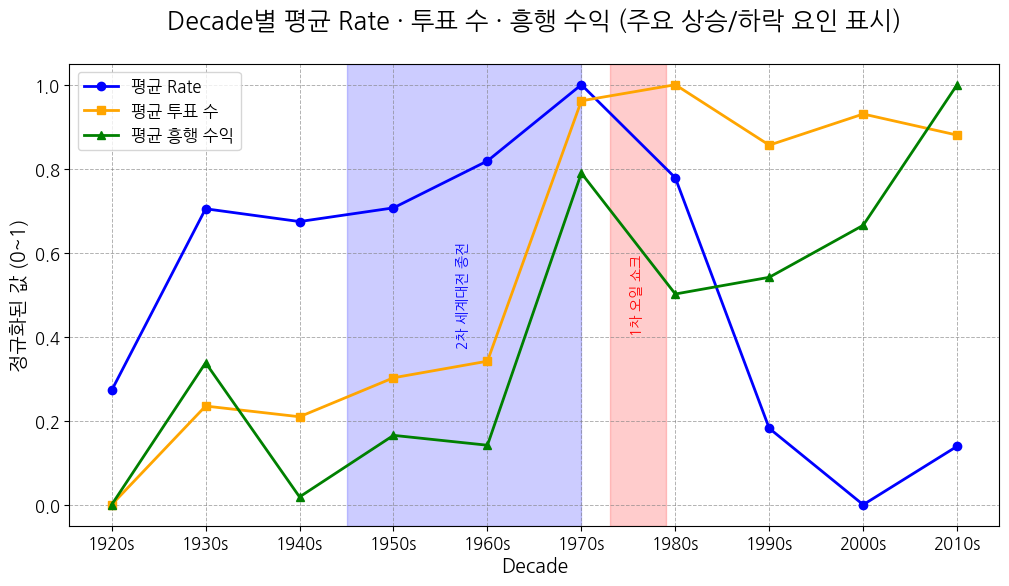

In [ ]:
plt.figure(figsize=(12,6))  # 📌 앞선 그래프들과 동일한 크기

plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"],
         marker="o", color="blue", linewidth=2, label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Vote_norm"],
         marker="s", color="orange", linewidth=2, label="평균 투표 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"],
         marker="^", color="green", linewidth=2, label="평균 흥행 수익")

# X축: 10년 단위 + 's' 라벨
decades = np.arange(decade_avg["Decade"].min(),
                    decade_avg["Decade"].max() + 10, 10)
decade_labels = [f"{d}s" for d in decades]
plt.xticks(decades, decade_labels, fontsize=12)
plt.yticks(fontsize=12)

plt.title("Decade별 평균 Rate · 투표 수 · 흥행 수익 (주요 상승/하락 요인 표시)",
          fontsize=18, pad=25)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("정규화된 값 (0~1)", fontsize=14)

# 🔑 눈에 잘 보이는 그리드 (앞선 그래프와 통일)
plt.grid(True, which="both", axis="both",
         color="gray", linestyle="--", linewidth=0.7, alpha=0.6)

# 📌 상승 사건: 전후 경제 호황 (1945~1970)
plt.axvspan(1945, 1970, color="blue", alpha=0.2)
plt.text((1945+1970)/2, 0.5, "2차 세계대전 종전",
         ha="center", va="center", rotation=90,
         color="blue", fontsize=10)

# 📌 하락 사건: 오일 쇼크 (1973~1979)
plt.axvspan(1973, 1979, color="red", alpha=0.2)
plt.text((1973+1979)/2, 0.5, "1차 오일 쇼크",
         ha="center", va="center", rotation=90,
         color="red", fontsize=10)

# 범례
plt.legend(fontsize=12, frameon=True, facecolor="white", loc="upper left")
plt.show()

# 🎬 5. 영화 산업 지표와 세계 GDP·도시화율·영화 편수 연대별 비교 시각화

세계 GDP와 장기 도시화율 데이터를 불러와,  
**IMDB 데이터 기반 영화 산업 지표(평점, 투표 수, 흥행 수익, 영화 편수)**와 병합한 뒤  
연대별 추세를 시각화한다.  

- **내부 지표 + 영화 편수** → **실선**  
- **외부 지표(GDP·도시화율)** → **점선**  
👉 두 데이터군 간의 상관적 변화를 직관적으로 파악 가능  

---

## 1️⃣ 데이터 로드 및 전처리

- **IMDB Top 1000 (omarhanyy/imdb-top-1000)**  
  - 주로 질적 지표 확보 목적  
  - `Rate_norm` : 평균 평점  
  - `Vote_norm` : 평균 투표 수  
  - `Gross_norm` : 평균 흥행 수익  
  - ✅ 단, 이 데이터셋은 **상위 1000편**만 포함 → 전체 제작량 규모 반영 불가  

- **IMDB basics (ashirwadsangwan/imdb-dataset)**  
  - 양적 지표(제작량) 확보 목적  
  - `titleType=="movie"` 필터링 후 연대별 영화 편수 산출  
  - `Movie_norm` : 연대별 영화 제작 편수 (정규화)  
  - ✅ Top 1000은 샘플링된 집합이라 **전체 편수 추세 왜곡** 가능성 → 별도 데이터셋 사용  

- **Maddison Project Database (GDP)**  
  - 세계 GDP → 연대별 평균 → `GDP_norm`  

- **세계 도시화율 데이터**  
  - `Entity=="World"` 추출 → 연대별 평균 → `Urban_norm`  

---

## 2️⃣ 병합 구조
- 내부 지표 (Top 1000 기반): `Rate_norm`, `Vote_norm`, `Gross_norm`  
- 영화 편수 (Basics 기반): `Movie_norm`  
- 외부 지표: `GDP_norm`, `Urban_norm`  
- 공통 키 **`Decade`**로 merge → `merged_all` 완성  

---

## 3️⃣ 시각화 규칙
- 🎬 영화 지표 (실선): Rate, Vote, Gross, **Movie**  
- 🌍 외부 지표 (점선): GDP, Urbanization  
- 📅 X축: 10년 단위 (`1950s`)  
- 📊 모든 값은 0~1 정규화 후 비교  

---

## 4️⃣ 해석 포인트
- **Movie_norm ↔ GDP/Urban_norm**  
  → 경제 성장·도시화 확산이 **제작량 증가**와 동반  
- **Gross_norm ↔ GDP_norm**  
  → 경제 규모 확대 → 흥행 수익 증가  
- **Vote_norm ↔ Urban_norm**  
  → 도시화 → 관객 참여 확대  
- **Rate_norm ↔ 외부 지표**  
  → 직접적 영향 미약 → 문화·비평 요인 중심  

---

> 💡 **Note:**  
> - **질적 지표**는 *IMDB Top 1000*을 통해 확보 (대표성 있는 영화들의 평점·투표·흥행 데이터)  
> - **양적 지표(영화 편수)**는 *IMDB basics* 전체 DB에서 추출 (산업 규모 반영)  
> - 따라서 서로 다른 IMDB 소스를 병행하여, **질적 변화 + 양적 성장**을 함께 분석 가능.

In [ ]:
# =========================================
# Config (파일 경로)
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MPD_PATH   = "mpd2023_web.xlsx"                   # Maddison Project (업로드 파일)
URBAN_PATH = "long-term-urban-population-region.csv"  # 도시화율 CSV (업로드 파일)

In [ ]:
# Download latest version
mv_count_csv_path = kagglehub.dataset_download("ashirwadsangwan/imdb-dataset")
tsv_file = os.path.join(mv_count_csv_path, "title.basics.tsv")
ashirwadsangwan_df = pd.read_csv(
    tsv_file,
    sep="\t",
    dtype=str,
    na_values="\\N"
)
# print(df.columns)
# 1. 영화만 필터링
movies = ashirwadsangwan_df[ashirwadsangwan_df["titleType"] == "movie"].copy()

# 2. 결측치 제거 + 숫자로 변환
movies = movies[movies["startYear"].notna()]
movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")

# 3. 1920~2029 사이만 선택 (2020년대까지 포함하려고 upper bound는 2020)
movies = movies[(movies["startYear"] >= 1920) & (movies["startYear"] <= 2020)]

# 4. 10년 단위로 그룹핑 (예: 1920~1929 → 1920s)
movies["decade"] = (movies["startYear"] // 10) * 10

# 5. 집계
decade_counts = (
    movies.groupby("decade")["tconst"]
    .count()
    .reset_index(name="movie_count")
    .sort_values("decade")
)
display(decade_counts)

,decade,movie_count
0,1920,22098
1,1930,20594
2,1940,14735
3,1950,23855
4,1960,31860
5,1970,40534
6,1980,44247
7,1990,46076
8,2000,78501
9,2010,168720


In [ ]:
# plt.figure(figsize=(14,6))
# plt.plot(decade_counts['decade'], decade_counts['movie_count'], marker='o', color='red')
# plt.title("Decade-wise Movie Production (1920-2020)", fontsize=16)
# plt.xlabel("Decade")
# plt.ylabel("Number of Movies")
# plt.grid(True, alpha=0.3)
# plt.show()

✅ World GDP 구성: 국가 (1인당GDP×인구) 합산 (열: gdppc × pop) (World 시리즈 부재 → 합산 구성)


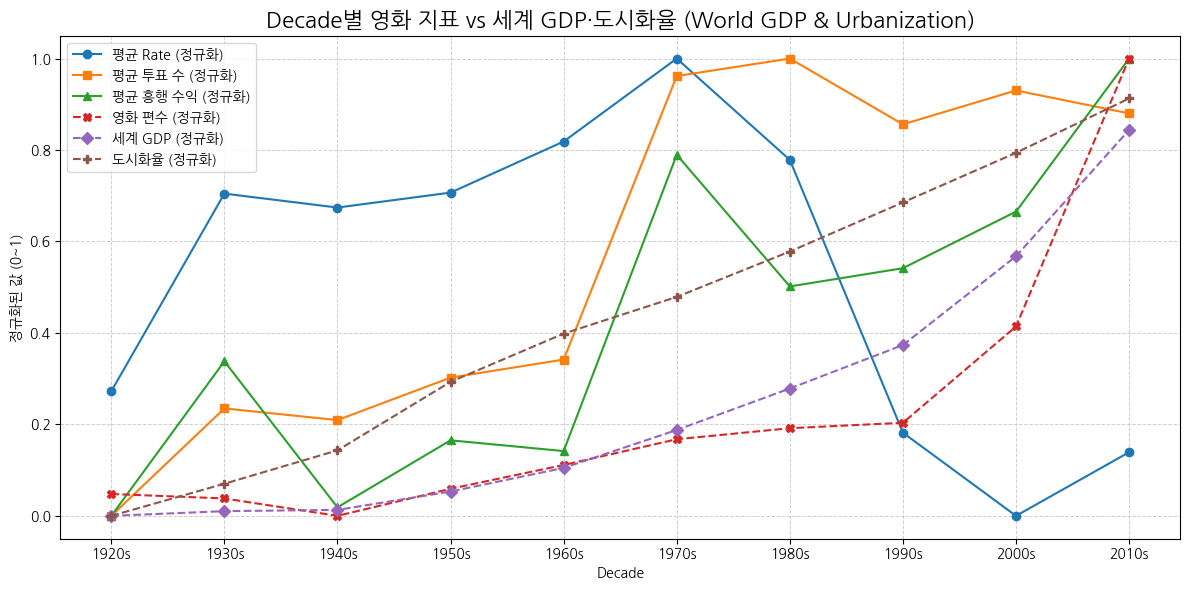

In [ ]:
# -----------------------------------------
# 유틸
# -----------------------------------------
def minmax_norm(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce")
    rng = s.max() - s.min()
    return (s - s.min()) / rng if pd.notnull(rng) and rng != 0 else s*0

def _first_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand in low:
            return low[cand]
    return None

# -----------------------------------------
# 1) MPD에서 세계(World) GDP → 연대 평균 + 정규화
# -----------------------------------------
def load_maddison_world_gdp(xlsx_path: str, year_start: int = 1920, year_end: int | None = None) -> pd.DataFrame:
    sheets = pd.read_excel(xlsx_path, sheet_name=None)
    frames = []
    for _, df in sheets.items():
        if df is None or df.empty:
            continue
        country_col = _first_col(df, {"country", "entity", "countryname"})
        year_col    = _first_col(df, {"year"})
        if not country_col or not year_col:
            continue
        sub = df[[country_col, year_col] + [c for c in df.columns if c not in [country_col, year_col]]].copy()
        sub = sub.rename(columns={country_col: "country", year_col: "Year"})
        frames.append(sub.dropna(subset=["country", "Year"]))

    if not frames:
        raise ValueError("Maddison 파일에서 country/year를 가진 시트를 찾지 못했습니다.")

    md = pd.concat(frames, ignore_index=True)
    md["Year"] = pd.to_numeric(md["Year"], errors="coerce")
    md = md.dropna(subset=["Year"])

    total_gdp_col = _first_col(md, {"gdp", "gdp_total", "gdp (2011 us$)", "rgdpna_total", "rgdpna level", "gdp level"})
    gdppc_col = next((c for c in md.columns if any(k in c.lower() for k in
                    ["gdppc","rgdpnapc","cgdppc","gdp per capita","gdppc_2011","gdppc_ppp"])), None)
    pop_col   = _first_col(md, {"pop","population"})

    # 1) World 시리즈 직접 사용
    world_rows = md[md["country"].str.lower().eq("world")].copy()
    if not world_rows.empty:
        if total_gdp_col is not None:
            world_rows["GDP_world"] = pd.to_numeric(world_rows[total_gdp_col], errors="coerce")
            unit_note = f"World 총량(열: {total_gdp_col}) 사용"
        elif gdppc_col is not None and pop_col is not None:
            world_rows["GDP_world"] = (pd.to_numeric(world_rows[gdppc_col], errors="coerce") *
                                       pd.to_numeric(world_rows[pop_col],   errors="coerce"))
            unit_note = f"World 총량 부재 → 1인당GDP×인구 (열: {gdppc_col} × {pop_col})"
        elif gdppc_col is not None:
            world_rows["GDP_world"] = pd.to_numeric(world_rows[gdppc_col], errors="coerce")  # proxy
            unit_note = f"World 총량/인구 부재 → 1인당GDP proxy (열: {gdppc_col})"
        else:
            raise ValueError("World 행이 있지만 GDP 계산에 필요한 열이 없음.")

        if year_end is not None:
            world_rows = world_rows[(world_rows["Year"] >= year_start) & (world_rows["Year"] <= year_end)]
        else:
            world_rows = world_rows[world_rows["Year"] >= year_start]

        world_rows["Decade"] = (world_rows["Year"] // 10) * 10
        dec = (world_rows.groupby("Decade", as_index=False)["GDP_world"]
                         .mean().sort_values("Decade").reset_index(drop=True))
        dec = dec.rename(columns={"GDP_world": "GDP_world_total"})
        dec["GDP_norm"] = minmax_norm(dec["GDP_world_total"])
        dec.attrs["unit_note"] = unit_note + " (World 시리즈 직접 사용)"
        return dec

    # 2) World가 없으면 국가별 총량 합산
    if total_gdp_col is not None:
        md["_GDP_total"] = pd.to_numeric(md[total_gdp_col], errors="coerce")
        unit_note = f"국가 총량 합산 (열: {total_gdp_col})"
    elif gdppc_col is not None and pop_col is not None:
        md["_GDP_total"] = (pd.to_numeric(md[gdppc_col], errors="coerce") *
                            pd.to_numeric(md[pop_col],   errors="coerce"))
        unit_note = f"국가 (1인당GDP×인구) 합산 (열: {gdppc_col} × {pop_col})"
    else:
        raise ValueError("총량/1인당GDP×인구 열이 없어 전세계 총량 구성 불가")

    if year_end is not None:
        md = md[(md["Year"] >= year_start) & (md["Year"] <= year_end)]
    else:
        md = md[md["Year"] >= year_start]

    world_year = (md.groupby("Year", as_index=False)["_GDP_total"]
                    .sum(min_count=1)
                    .rename(columns={"_GDP_total": "GDP_world_total"}))
    world_year["Decade"] = (world_year["Year"] // 10) * 10
    dec = (world_year.groupby("Decade", as_index=False)["GDP_world_total"]
                    .mean().sort_values("Decade").reset_index(drop=True))
    dec["GDP_norm"] = minmax_norm(dec["GDP_world_total"])
    dec.attrs["unit_note"] = unit_note + " (World 시리즈 부재 → 합산 구성)"
    return dec

# -----------------------------------------
# 2) 도시화율(World) → 연대 평균 + 정규화
# -----------------------------------------
def load_urban_rate(csv_path: str, entity: str = "World", year_start: int = 1920) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df = df.rename(columns=lambda x: x.strip())
    if "Entity" not in df.columns or "Year" not in df.columns:
        raise ValueError("CSV에 Entity/Year 컬럼이 없습니다.")

    urb_col = next((c for c in df.columns if "urban" in c.lower()), None)
    if urb_col is None:
        raise ValueError("도시화율(urban share) 관련 컬럼을 찾지 못했습니다.")

    world = df[df["Entity"] == entity].copy()
    world = world[world["Year"] >= year_start]
    world["Urban_rate"] = pd.to_numeric(world[urb_col], errors="coerce")

    world["Decade"] = (world["Year"] // 10) * 10
    dec = (world.groupby("Decade", as_index=False)["Urban_rate"]
                .mean().sort_values("Decade").reset_index(drop=True))
    dec["Urban_norm"] = minmax_norm(dec["Urban_rate"])
    return dec

# -----------------------------------------
# 3) 내부 decade_avg와 병합
# -----------------------------------------
def merge_all(decade_avg: pd.DataFrame,
              world_decade_gdp: pd.DataFrame,
              urban_decade: pd.DataFrame,
              movie_counts: pd.DataFrame | None = None) -> pd.DataFrame:
    out = decade_avg.copy()

    # 내부 지표 정규화 컬럼 생성(없을 때만)
    if "Rate_norm" not in out and "Avg_Rate" in out:
        out["Rate_norm"] = minmax_norm(out["Avg_Rate"])
    if "Vote_norm" not in out and "Avg_Vote" in out:
        out["Vote_norm"] = minmax_norm(out["Avg_Vote"])
    if "Gross_norm" not in out and "Avg_Gross" in out:
        out["Gross_norm"] = minmax_norm(out["Avg_Gross"])

    # 외부 지표 병합
    out = pd.merge(out, world_decade_gdp[["Decade","GDP_world_total","GDP_norm"]],
                   on="Decade", how="left")
    out = pd.merge(out, urban_decade[["Decade","Urban_rate","Urban_norm"]],
                   on="Decade", how="left")

    # ✅ 영화 편수 병합 + 정규화
    if movie_counts is not None and not movie_counts.empty:
        mc = movie_counts.copy()

        # 컬럼 표준화: 'Decade' / 'movie_count'
        if "Decade" not in mc.columns:
            if "decade" in mc.columns:
                mc = mc.rename(columns={"decade":"Decade"})
            else:
                raise ValueError("movie_counts에 'Decade' 또는 'decade' 컬럼이 필요합니다.")
        if "movie_count" not in mc.columns:
            # 흔한 대체 이름들 처리
            cand = [c for c in mc.columns if c.lower() in ("count","n","num_movies","moviecount","tconst_count")]
            if cand:
                mc = mc.rename(columns={cand[0]:"movie_count"})
            else:
                raise ValueError("movie_counts에 'movie_count' 컬럼이 필요합니다.")

        mc["movie_count"] = pd.to_numeric(mc["movie_count"], errors="coerce")
        mc = mc.dropna(subset=["Decade","movie_count"])
        mc = mc.groupby("Decade", as_index=False)["movie_count"].sum()

        mc["Movie_norm"] = minmax_norm(mc["movie_count"])
        out = pd.merge(out, mc[["Decade","movie_count","Movie_norm"]], on="Decade", how="left")

    return out

# -----------------------------------------
# 4) 시각화 (영화=실선, GDP/Urban=점선)
# -----------------------------------------
def plot_with_gdp_urban(merged: pd.DataFrame,
                        title_suffix=" (World GDP & Urbanization)"):

    plt.figure(figsize=(12,6))

    # 🎬 영화 지표: 실선
    if "Rate_norm" in merged:
        plt.plot(merged["Decade"], merged["Rate_norm"], marker="o", linestyle="-", label="평균 Rate (정규화)")
    if "Vote_norm" in merged:
        plt.plot(merged["Decade"], merged["Vote_norm"], marker="s", linestyle="-", label="평균 투표 수 (정규화)")
    if "Gross_norm" in merged:
        plt.plot(merged["Decade"], merged["Gross_norm"], marker="^", linestyle="-", label="평균 흥행 수익 (정규화)")

    # ✅ 영화 편수: 실선(다른 마커)
    if "Movie_norm" in merged:
        plt.plot(merged["Decade"], merged["Movie_norm"], marker="X", linestyle="--", label="영화 편수 (정규화)")

    # 🌍 외부 지표: 점선
    if "GDP_norm" in merged:
        plt.plot(merged["Decade"], merged["GDP_norm"],   marker="D", linestyle="--", label="세계 GDP (정규화)")
    if "Urban_norm" in merged:
        plt.plot(merged["Decade"], merged["Urban_norm"], marker="P", linestyle="--", label="도시화율 (정규화)")

    # X축: 10년 단위 + 's'
    decades = np.arange(merged["Decade"].min(), merged["Decade"].max() + 10, 10)
    plt.xticks(decades, [f"{d}s" for d in decades])

    plt.xlabel("Decade")
    plt.ylabel("정규화된 값 (0~1)")
    plt.title(f"Decade별 영화 지표 vs 세계 GDP·도시화율{title_suffix}", fontsize=16)

    plt.grid(True, which="both", axis="both", linestyle="--", linewidth=0.7, alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# -----------------------------------------
# 5) 실행 예시
# -----------------------------------------
world_decade = load_maddison_world_gdp(MPD_PATH, year_start=1920)
urban_decade = load_urban_rate(URBAN_PATH, entity="World", year_start=1920)

print("✅ World GDP 구성:", world_decade.attrs.get("unit_note", ""))

# ✅ decade_counts를 함께 넘겨서 병합
merged_all = merge_all(decade_avg, world_decade, urban_decade, movie_counts=decade_counts)

plot_with_gdp_urban(merged_all)

#### 7. 내부 지표 vs 외부 지표 상관관계 분석

## 1. 분석 대상
- **내부 지표**
  - `Rate_norm` : 평균 평점 (정규화)  
  - `Vote_norm` : 평균 투표 수 (정규화)  
  - `Gross_norm` : 평균 흥행 수익 (정규화)  
  - `Movie_norm` : 영화 편수 (정규화)  
- **외부 지표**
  - `GDP_norm` : 세계 GDP (정규화)  
  - `Urban_norm` : 세계 도시화율 (정규화)  

## 2. 분석 방법
- **피어슨 상관계수 (Pearson)**  
  - 두 변수 간 **선형적 관계**를 측정  
  - 값 범위: -1 ~ 1  
    - 1에 가까울수록 강한 양(+)의 선형 관계  
    - -1에 가까울수록 강한 음(-)의 선형 관계  
    - 0 근처는 선형 관계가 약함  

## 3. 출력 결과
- **`corr_pearson`** : 내부·외부 지표 간 **피어슨 상관계수 행렬**  

## 4. 해석 포인트
- `Gross_norm` ↔ `GDP_norm` : 강한 양(+)의 상관 관계  
  → 경제 규모가 커질수록 흥행 수익도 함께 증가  
- `Vote_norm` ↔ `Urban_norm` : 중간 수준 양(+)의 상관 관계  
  → 도시화가 진행될수록 투표 참여(관객 수)도 늘어남  
- `Movie_norm` ↔ `GDP_norm`, `Urban_norm` : 뚜렷한 양(+)의 상관 관계  
  → 경제 성장·도시화 확산이 **제작량 증가**와 직접 연결  
- `Rate_norm` ↔ 외부 지표 : 약하거나 거의 무관  
  → 평점은 경제·인구학적 요인보다는 **문화·비평 요인**에 좌우됨

In [ ]:
# 내부 지표 + 외부 지표 + 영화 편수까지 선택
cols = ["Rate_norm", "Vote_norm", "Gross_norm", "Movie_norm", "GDP_norm", "Urban_norm"]

# 피어슨 상관계수 (선형 관계)
corr_pearson = merged_all[cols].corr(method="pearson")

print("=== 피어슨 상관계수 ===")
display(corr_pearson)

=== 피어슨 상관계수 ===


,Rate_norm,Vote_norm,Gross_norm,Movie_norm,GDP_norm,Urban_norm
Rate_norm,1.000000,-0.165268,-0.279062,-0.554560,-0.636257,-0.453104
Vote_norm,-0.165268,1.000000,0.869877,0.561852,0.735360,0.879779
Gross_norm,-0.279062,0.869877,1.000000,0.793180,0.845967,0.839615
Movie_norm,-0.554560,0.561852,0.793180,1.000000,0.945902,0.796237
GDP_norm,-0.636257,0.735360,0.845967,0.945902,1.000000,0.927155
Urban_norm,-0.453104,0.879779,0.839615,0.796237,0.927155,1.000000


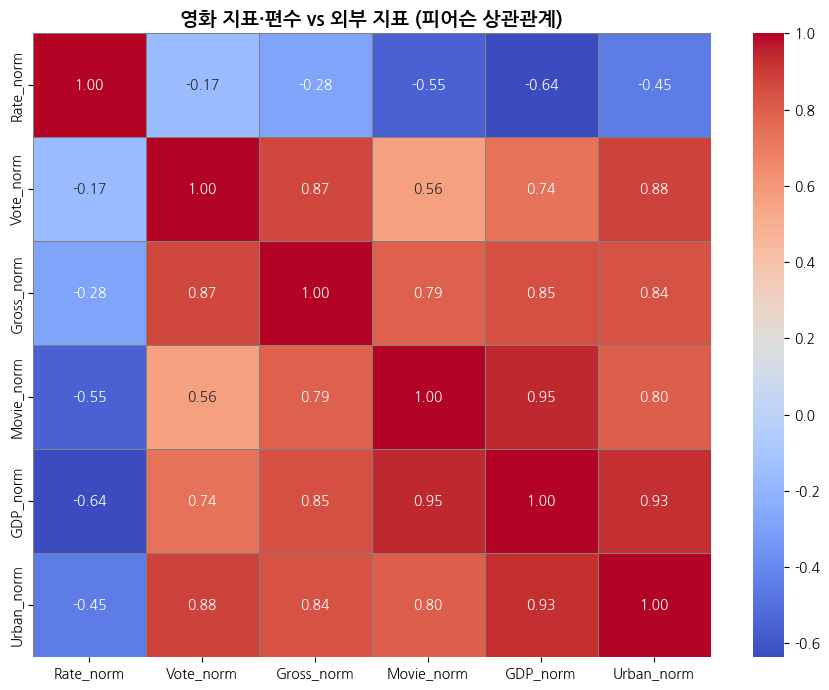

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cbar=True,
            cmap="coolwarm", linewidths=0.5, linecolor="gray")
plt.title("영화 지표·편수 vs 외부 지표 (피어슨 상관관계)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()